# House Price Predictions
Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
train_df = pd.read_csv('train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [26]:
train_df.shape

(1460, 81)

In [4]:
test_df = pd.read_csv('test.csv')
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [27]:
test_df.shape

(1459, 80)

In [5]:
# Select relevant features
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
target = 'SalePrice'

In [6]:
# Create a new dataframe with the selected features
df_train = train_df[features + [target]].dropna()

In [7]:
# Create a new feature for total bathrooms
df_train['TotalBath'] = df_train['FullBath'] + 0.5 * df_train['HalfBath']

In [8]:
# Only keep GrLivArea, BedroomAbvGr, TotalBath, and SalePrice
df_train = df_train[['GrLivArea', 'BedroomAbvGr', 'TotalBath', 'SalePrice']]

In [9]:
# Preprocess test data
df_test = test_df[features].dropna()
df_test['TotalBath'] = df_test['FullBath'] + 0.5 * df_test['HalfBath']
df_test = df_test[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]

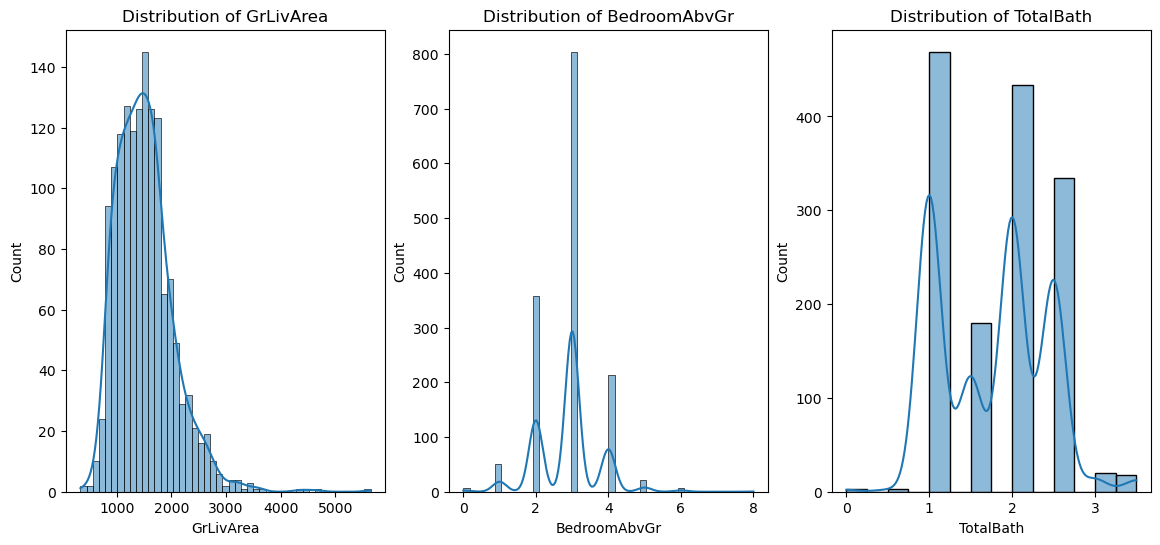

In [10]:
# Plot the distribution of features
plt.figure(figsize=(14, 6))
for i, feature in enumerate(['GrLivArea', 'BedroomAbvGr', 'TotalBath'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.show()

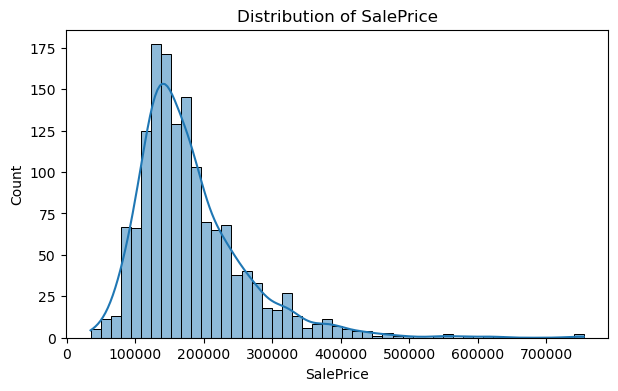

In [11]:
# Plot the distribution of target variable
plt.figure(figsize=(7, 4))
sns.histplot(df_train[target], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

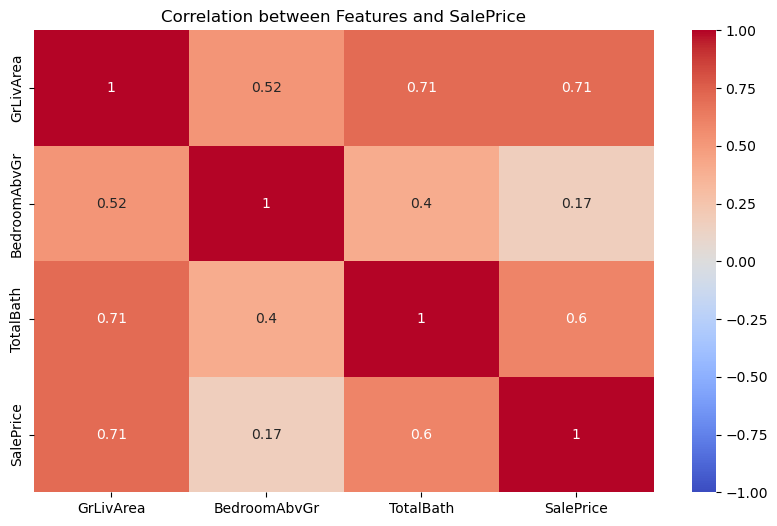

In [12]:
# Correlation Plot
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Features and SalePrice')
plt.show()

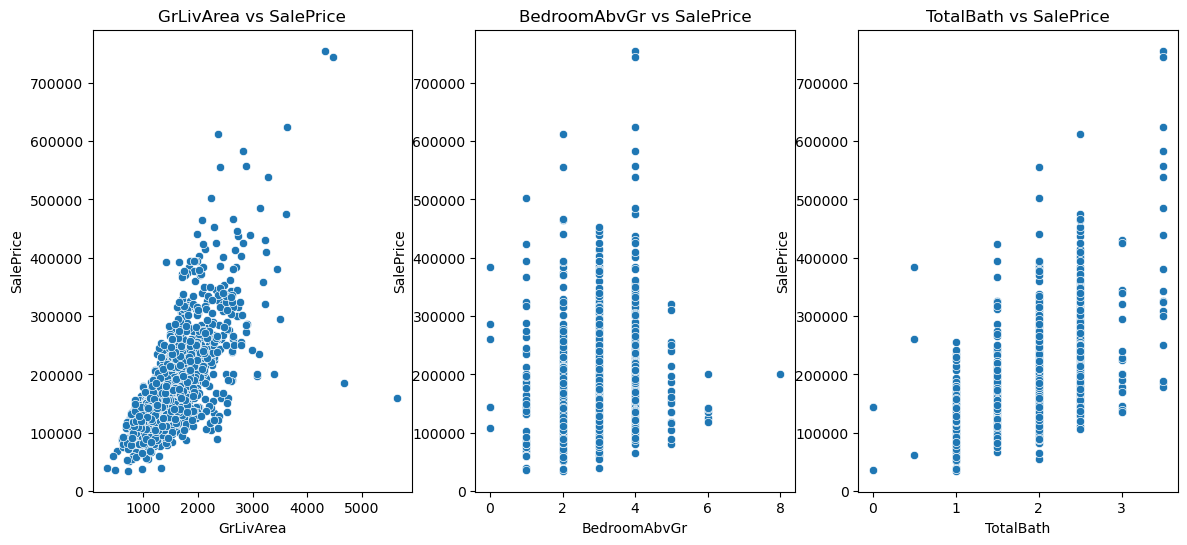

In [13]:
#Scatter Plots
plt.figure(figsize=(14, 6))
for i, feature in enumerate(['GrLivArea', 'BedroomAbvGr', 'TotalBath'], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df_train, x=feature, y=target)
    plt.title(f'{feature} vs SalePrice')
plt.show()


In [14]:
# Split the data into features (X) and target (y)
X = df_train.drop(columns=target)
y = df_train[target]

In [15]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make predictions on the validation set
y_pred = model.predict(X_val)

In [19]:
# Evaluate the model
mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 36569.644427873995


In [20]:
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 2848523443.4191


In [21]:
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 53371.560249060545


In [22]:
r2 = r2_score(y_val, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.6286307301050609


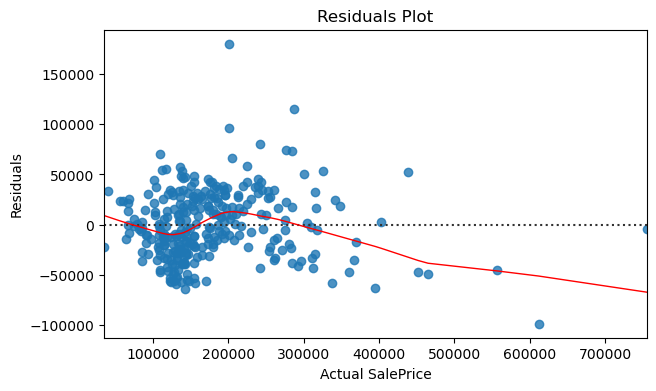

In [23]:
plt.figure(figsize=(7, 4))
sns.residplot(x=y_val, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Actual SalePrice')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [24]:
# Make predictions on the test set
test_predictions = model.predict(df_test)


In [25]:
# Save the predictions to a CSV file
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions
})
submission.to_csv('C:/Users/Priyanka/Downloads/house_price_predictions.csv', index=False)